## POSTTEST 3 Kecerdasan Buatan
### NIM : 2209106069
### NAMA : Rifki Nurhidayat
### KELAS : B1 2022


# Import  Pandas Dan Deklarasi DataFrame Untuk Membaca Dataset
Agar bisa menggunakan pandas, perlu untuk melakukan import paket dahulu, Kemudian dari sklearn.model_selection kita mengimport train_test_split untuk membagi dataset. Setelah itu  kita deklarasikan DataFrame (df) dengan pd.read_csv untuk membaca file csv

In [1]:
import pandas as pd
df = pd. read_csv("World Happiness Report 2024.csv")

## Data Cleaning  
Data Cleaning merupakan proses mengidentifikasi dan perbaikan masalah kesalahan input, nilai yang hilang, dan duplikasi.
### 1. Handling Missing Value
Pada bagian ini kita akan menangani nilai yang hilang. Terlebih dahulu dilakukan pengecekan missing value menggunakan .isnull().sum() atau .isna().sum()

In [2]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

Pada langkah ini, kita menangani *missing values* pada dataset menggunakan metode imputasi.

### 1. Mengisi Nilai Hilang pada Kolom Numerik
Perintah berikut digunakan untuk mengisi nilai yang hilang pada kolom numerik dengan nilai MEDIAN dari masing-masing kolom.

In [3]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# df.fillna(df.median(numeric_only=True), inplace=True)

Fungsi: Perintah ini mengisi nilai yang hilang (missing values) pada kolom numerik dengan median dari setiap kolom numerik.

### 2. Handling Duplicate Value
Pertama kita akan mengecek data yang duplikat dengan df.duplicated().sum() yang akan menghitung berapa banyak data yang terduplikat.

In [4]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


Karena tidak ada nilai yang terduplikat, maka kita lanjut ke data cleaning selanjutnya

### 3. Handling Outlier
Outlier/Pencilan merupakan nilai yang berbeda dari sebagian besar data dalam
suatu sampel atau populasi (nilai ekstrim). Nilai ini dapat muncul karena berbagai
alasan seperti kesalahan pengukuran, anomali, atau variasi alami dalam data.

C:\Users\TUF\venv_B1-22\Rifki_069\POSTTEST3\Rifki_069\lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.21.3)
  from scipy.stats import gaussian_kde


<AxesSubplot: ylabel='Healthy life expectancy at birth'>

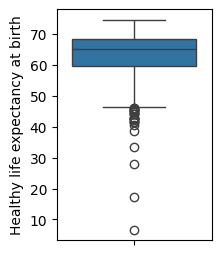

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df['Healthy life expectancy at birth']) #buat boxplot

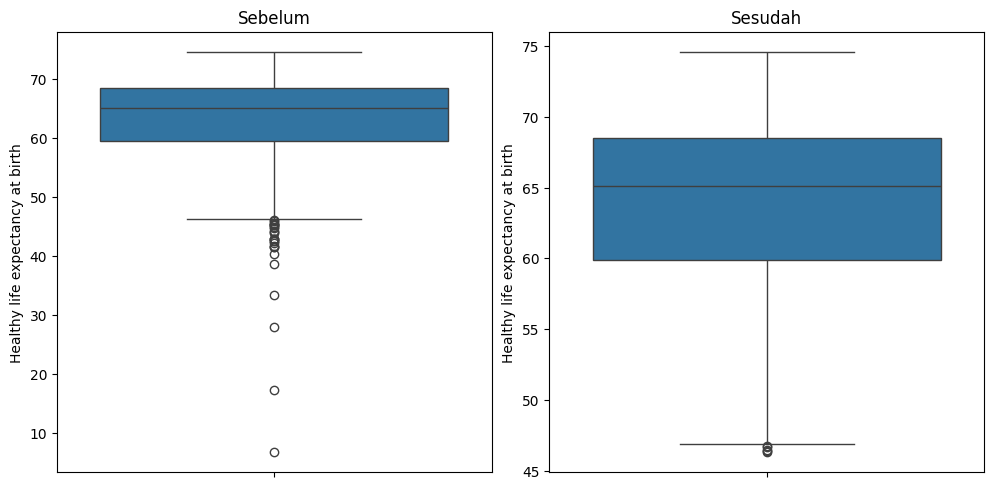

In [6]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
plt.tight_layout()
sns.boxplot(df['Healthy life expectancy at birth'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['Healthy life expectancy at birth'].quantile(0.25)
Q3 = df['Healthy life expectancy at birth'].quantile(0.75)
IQR = Q3 - Q1

#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
df['Healthy life expectancy at birth'] = df['Healthy life expectancy at birth'][~((df['Healthy life expectancy at birth'] < (Q1 - 1.5 * IQR)) |
(df['Healthy life expectancy at birth'] > (Q3 + 1.5 * IQR)))]
#setelah handling oulier
sns.boxplot(df['Healthy life expectancy at birth'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

Boxplot adalah alat yang sangat berguna untuk mengidentifikasi outlier, karena visualisasi ini menampilkan persebaran data secara ringkas, termasuk median, kuartil, dan outlier.

### 2. Normalisasi kolom numerik
Normalisasi merupakan proses mengubah skala data agar nilainya berada
dalam rentang tertentu, misalnya 0 hingga 1.

In [11]:
df.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [10]:
# Deklerasi Min Max Scaller
scaler = MinMaxScaler(feature_range=(0,1))
#Numerical Columns
num_col_ = [col for col in df.columns if
  df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]
#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0.166667,0.362488,0.296590,0.293028,0.149011,0.647151,0.484644,0.892847,0.334059,0.282154
1,0.222222,0.463144,0.322323,0.426927,0.159605,0.595335,0.507011,0.859462,0.429311,0.248219
2,0.277778,0.516071,0.339441,0.409494,0.170198,0.491264,0.440188,0.708347,0.479666,0.309699
3,0.333333,0.378536,0.334132,0.385820,0.180791,0.353559,0.480836,0.734022,0.427059,0.296594
4,0.388889,0.371296,0.347021,0.385205,0.191384,0.399846,0.552107,0.780971,0.616754,0.297791


### 3. Encoding kolom kategorikal
Encoding merupakan proses yang mengubah data kategorikal menjadi data
numerikal yang dapat dipahami oleh algoritma machine learning.

#### One-Hot Encoding
One hot encoding bertujuan untuk mengubah data kategorikal nominal menjadi boolean (true false) dimana setiap data kategori unik akan di-expand menjadi kolom atau parameter baru.

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
oh_encoded = ohe.fit_transform(df[['year']]) 
categories = ohe.categories_[0]

encoded = pd.DataFrame(oh_encoded, columns=[f'year_{int(cat)}' for cat in categories])
encoded

,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 4. Feature Engineering
Feature Engineering merupakan sebuah proses untuk mengembangkan dan memilih suatu fitur atau atribut (features) yang akan digunakan untuk melakukan analisis data atau dalam melakukan pembuatan sebuah model machine learning. Feature engineering dapat dilakukan dengan menemukan varibel baru, melakukan transformasi variabel, mengekstrak data mentah untuk menghasilkan fitur baru, dan juga mengidentifikasi serta memilih fitur yang paling sesuai dari data dan menghapus fitur yang tidak relevan atau kurang penting.

In [24]:
# Mengelompokkan 'Healthy Life Expectancy' menjadi kategori
bins = [0, 50, 70, 90]  # Batas pengelompokan, bisa disesuaikan
labels = ['Low', 'Medium', 'High']
df['Tingkat Ekspetasi'] = pd.cut(df['Healthy life expectancy at birth'], bins=bins, labels=labels)

# Melihat hasilnya
df[['Healthy life expectancy at birth', 'Life Expectancy Category']].head()

,Healthy life expectancy at birth,Life Expectancy Category
0,50.500000,Medium
1,50.799999,Medium
2,51.099998,Medium
3,51.400002,Medium
4,51.700001,Medium


### 5. Splitting data ke dalam data training & data testing
Data splitting adalah salah satu metode yang dapat digunakan untuk mengevaluasi
performa model machine learning dan mengurangi terjadinya overfitting. Metode ini
membagi dataset menjadi dua bagian atau lebih yang membentuk sub himpunan data.
Umumnya, data split memisahkan dua bagian, bagian pertama digunakan untuk
mengevaluasi atau uji data dan data lainnya digunakan untuk melatih model.

In [29]:
# Subset feature dan target

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split

# Splitting the data (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Output the shape of the training and testing data
#Melihat Dimensi Data X, y Train dan Test
print('Dimensi X train: ', X_train.shape)
print('Dimensi X test: ', X_test.shape)
print('Dimensi Y train: ', Y_train.shape)
print('Dimensi Y test: ', Y_test.shape)

Dimensi X train:  (1890, 13)
Dimensi X test:  (473, 13)
Dimensi Y train:  (1890,)
Dimensi Y test:  (473,)
